## Project 2 (Data Analysis) (WIP)
### Stack Overflow annual developer survey


1) At what companies do developers get paid the most?
2) How much does remote working matter to employees?
3) What's the most popular method of learning to code?
4) Are you more likely to get a job as a developer if you have a master's degree?


In [1]:
import pandas as pd
import re
from datetime import datetime
import requests


df = pd.read_csv("survey_results_public.csv")
df_schema = pd.read_csv("survey_results_schema.csv")

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print(list(df))
print(list(df_schema))


['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFr

In [2]:
## At what companies to developers get paid the most?

# Step 0) Clean the data set. Remove any rows that have NaN values in either the Currency, Industry or CompTotal columns. Change Currency column to currency codes.

df_cleaned = df[~(df['Currency'].isna() | df['Industry'].isna() | df['CompTotal'].isna())]
data_length = len(df_cleaned)

def extract_currency_code(entry):
    return re.split(r'[ \t]+', entry)[0]
    
df_cleaned['Currency_Code'] = df_cleaned['Currency'].apply(extract_currency_code)


/tmp/ipykernel_172655/235771089.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Currency_Code'] = df_cleaned['Currency'].apply(extract_currency_code)


In [3]:
# Step 1) Since we are dealing with different currencies let's first write a function that converts all currencies to USD.


# Function to get the exchange rate from v6.exchangerate-api.com
def get_exchange_rate(api_key, target_currency='USD'):

    url = f'https://v6.exchangerate-api.com/v6/{api_key}/latest/{target_currency}'
    response = requests.get(url)
    data = response.json()
    return data['conversion_rates']

rate_dict = get_exchange_rate('Your_API_Key_Here', 'USD') # get latest conversion USD conversion rates
    


# Define a function to convert amount to USD
def currency_conv(api_key, currency_code, amount):
    if currency_code == 'USD':
        return amount 
    rate = rate_dict[currency_code]
    return amount / rate



# Assume you have an API key
api_key = 'Your_API_Key_Here'

# Apply the conversion function to each row
df_cleaned['Comp_USD'] = df_cleaned.apply(lambda row: currency_conv(api_key, row['Currency_Code'], row['CompTotal']), axis=1)


/tmp/ipykernel_172655/3359241900.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Comp_USD'] = df_cleaned.apply(lambda row: currency_conv(api_key, row['Currency_Code'], row['CompTotal']), axis=1)


In [4]:
print(rate_dict)

columns_to_display = ['Currency_Code', 'CompTotal', 'Comp_USD']

# Visually inspect a few rows to see if values make sense
for i in range(25):
    row_values = [str(df_cleaned[col].iloc[i]) for col in columns_to_display]
    print(' | '.join(row_values))

{'USD': 1, 'AED': 3.6725, 'AFN': 70.6814, 'ALL': 92.1458, 'AMD': 387.6684, 'ANG': 1.79, 'AOA': 884.0984, 'ARS': 927.08, 'AUD': 1.5046, 'AWG': 1.79, 'AZN': 1.7003, 'BAM': 1.7963, 'BBD': 2.0, 'BDT': 117.5171, 'BGN': 1.7963, 'BHD': 0.376, 'BIF': 2881.9919, 'BMD': 1.0, 'BND': 1.3456, 'BOB': 6.9211, 'BRL': 5.5916, 'BSD': 1.0, 'BTN': 83.6891, 'BWP': 13.5644, 'BYN': 3.2676, 'BZD': 2.0, 'CAD': 1.3748, 'CDF': 2831.7653, 'CHF': 0.8894, 'CLP': 945.8152, 'CNY': 7.2857, 'COP': 4027.575, 'CRC': 529.1142, 'CUP': 24.0, 'CVE': 101.2735, 'CZK': 23.1735, 'DJF': 177.721, 'DKK': 6.8517, 'DOP': 59.1774, 'DZD': 134.6393, 'EGP': 48.4094, 'ERN': 15.0, 'ETB': 57.6466, 'EUR': 0.9185, 'FJD': 2.2409, 'FKP': 0.7736, 'FOK': 6.8517, 'GBP': 0.7736, 'GEL': 2.7078, 'GGP': 0.7736, 'GHS': 15.6024, 'GIP': 0.7736, 'GMD': 65.2744, 'GNF': 8666.4372, 'GTQ': 7.7608, 'GYD': 209.191, 'HKD': 7.8074, 'HNL': 24.7622, 'HRK': 6.9201, 'HTG': 131.8926, 'HUF': 357.7762, 'IDR': 16212.2942, 'ILS': 3.6364, 'IMP': 0.7736, 'INR': 83.6914, 'IQ

In [5]:
# Step 2) For each industry, let's find the average compensation in USD.

Industry_dict = {}

for i in range(len(df_cleaned)):
    if df_cleaned['Industry'].iloc[i] in Industry_dict:
        Industry_dict[df_cleaned['Industry'].iloc[i]].append(df_cleaned['Comp_USD'].iloc[i])
    else:
        Industry_dict[df_cleaned['Industry'].iloc[i]] = [df_cleaned['Comp_USD'].iloc[i]]


for k in Industry_dict:
    sallaries = Industry_dict[k]
    Industry_dict[k] = sum(sallaries) / len(sallaries)


In [ ]:
print(Industry_dict)

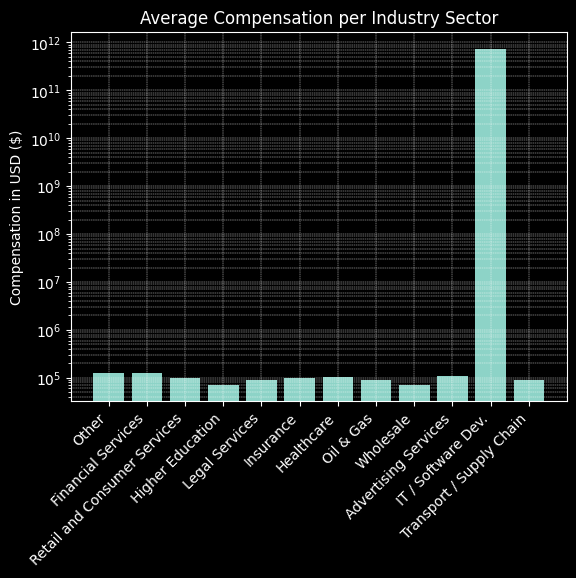

In [6]:
import matplotlib.pyplot as plt

Industry_dict['IT / Software Dev.'] = Industry_dict.pop('Information Services, IT, Software Development, or other Technology') #For readability
Industry_dict['Transport / Supply Chain'] = Industry_dict.pop('Manufacturing, Transportation, or Supply Chain')

plt.style.use('dark_background')
plt.bar(list(Industry_dict.keys()), list(Industry_dict.values()))
plt.xticks(rotation=45, ha='right', color='white', fontsize=10)
plt.yscale('log')
plt.grid(True, which='both', color='white', linestyle='--', linewidth=.3)
plt.ylabel("Compensation in USD ($)")
plt.title("Average Compensation per Industry Sector")
plt.show()

There is clearly an outlier or some other problem with the IT / Software Development average sallary value, let's investigate further.

49554


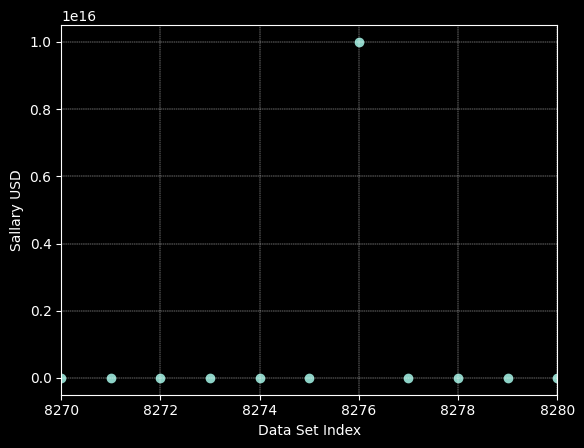

In [7]:
#Find outliers
import numpy as np

IT_Only = df_cleaned[df_cleaned['Industry'] == "Information Services, IT, Software Development, or other Technology"] #Let's inspect only the IT / Software Dev entries
x = np.arange(len(IT_Only))

plt.scatter(x, IT_Only['Comp_USD'])
plt.xlim(8270,8280)
plt.xlabel("Data Set Index")
plt.ylabel("Sallary USD")
plt.grid(True, which='both', color='white', linestyle='--', linewidth=.3)
print(IT_Only.iloc[8276]['ResponseId']) #Outlier at ResponseID 49554

The person with ResponseID 49554 claimed earnings of 10^16 USD (10 quadrillion) which is most certainly a mistake. Let's remove that entry and see the new sallary per industry sector distribution.

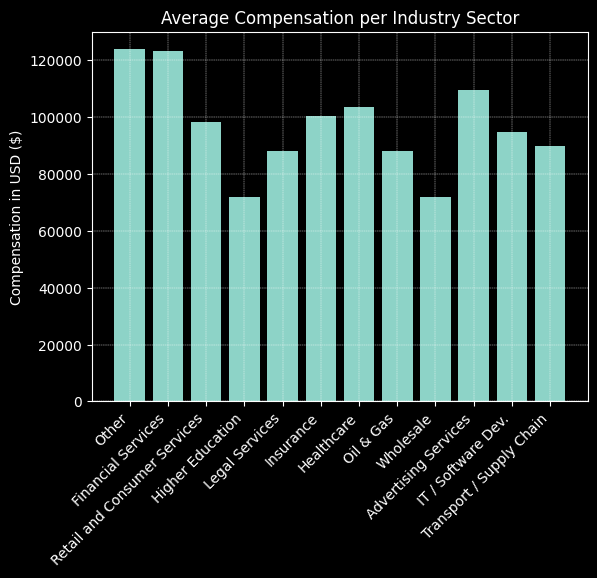

In [8]:
# Remove rows where 'City' is 'New York'
df_cleaned = df_cleaned[df_cleaned['ResponseId'] != 49554]


Industry_dict = {}

for i in range(len(df_cleaned)):
    if df_cleaned['Industry'].iloc[i] in Industry_dict:
        Industry_dict[df_cleaned['Industry'].iloc[i]].append(df_cleaned['Comp_USD'].iloc[i])
    else:
        Industry_dict[df_cleaned['Industry'].iloc[i]] = [df_cleaned['Comp_USD'].iloc[i]]


for k in Industry_dict:
    sallaries = Industry_dict[k]
    Industry_dict[k] = sum(sallaries) / len(sallaries)

Industry_dict['IT / Software Dev.'] = Industry_dict.pop('Information Services, IT, Software Development, or other Technology') #For readability
Industry_dict['Transport / Supply Chain'] = Industry_dict.pop('Manufacturing, Transportation, or Supply Chain')

plt.style.use('dark_background')
plt.bar(list(Industry_dict.keys()), list(Industry_dict.values()))
plt.xticks(rotation=45, ha='right', color='white', fontsize=10)
#plt.yscale('log')
plt.grid(True, which='both', color='white', linestyle='--', linewidth=.3)
plt.ylabel("Compensation in USD ($)")
plt.title("Average Compensation per Industry Sector")
plt.show()

Number of people who specified learninf methods:  87663
{'Books / Physical media': 45406, 'Colleague': 20523, 'Friend or family member': 9936, 'Hackathons (virtual or in-person)': 7033, 'Online Courses or Certification': 43201, 'On the job training': 40380, 'Other online resources (e.g., videos, blogs, forum)': 70244, 'School (i.e., University, College, etc)': 43957, 'Coding Bootcamp': 8602, 'Other (please specify):': 5451}


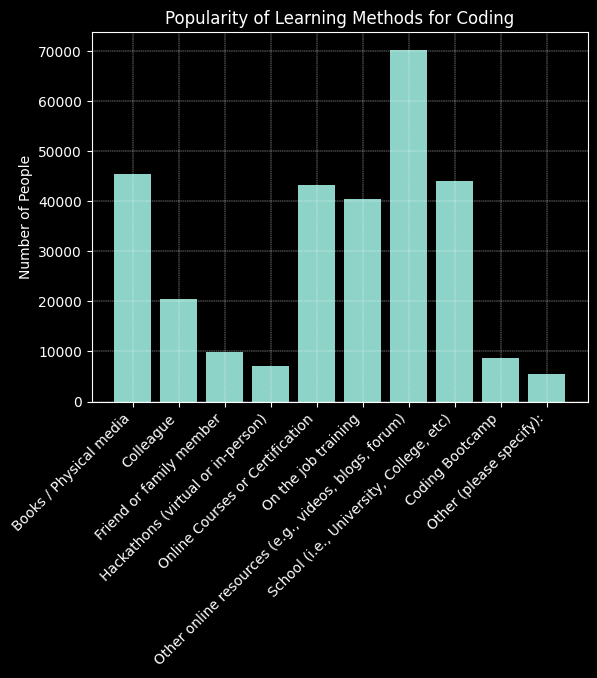

In [9]:
# What's the most popular method of learning to code?


def extract_learning_methods(entry, learn_methods_dict):
    methods = re.split(r'[\;]+', entry)
    for method in methods:
        if method in learn_methods_dict:
            learn_methods_dict[method] += 1
        else:
            learn_methods_dict[method] = 1


df_learn_methods_cleaned = df.dropna(subset=['LearnCode']) # Clean
print("Number of people who specified learninf methods: ", len(df_learn_methods_cleaned))
learn_methods_dict = {}

# Apply the function to each entry in the 'LearnCode' column
df_learn_methods_cleaned['LearnCode'].apply(extract_learning_methods, args=(learn_methods_dict,))

# Print the resulting dictionary
print(learn_methods_dict)

plt.style.use('dark_background')
plt.bar(list(learn_methods_dict.keys()), list(learn_methods_dict.values()))
plt.xticks(rotation=45, ha='right', color='white', fontsize=10)
#plt.yscale('log')
plt.grid(True, which='both', color='white', linestyle='--', linewidth=.3)
plt.ylabel("Number of People")
plt.title("Popularity of Learning Methods for Coding")
plt.show()

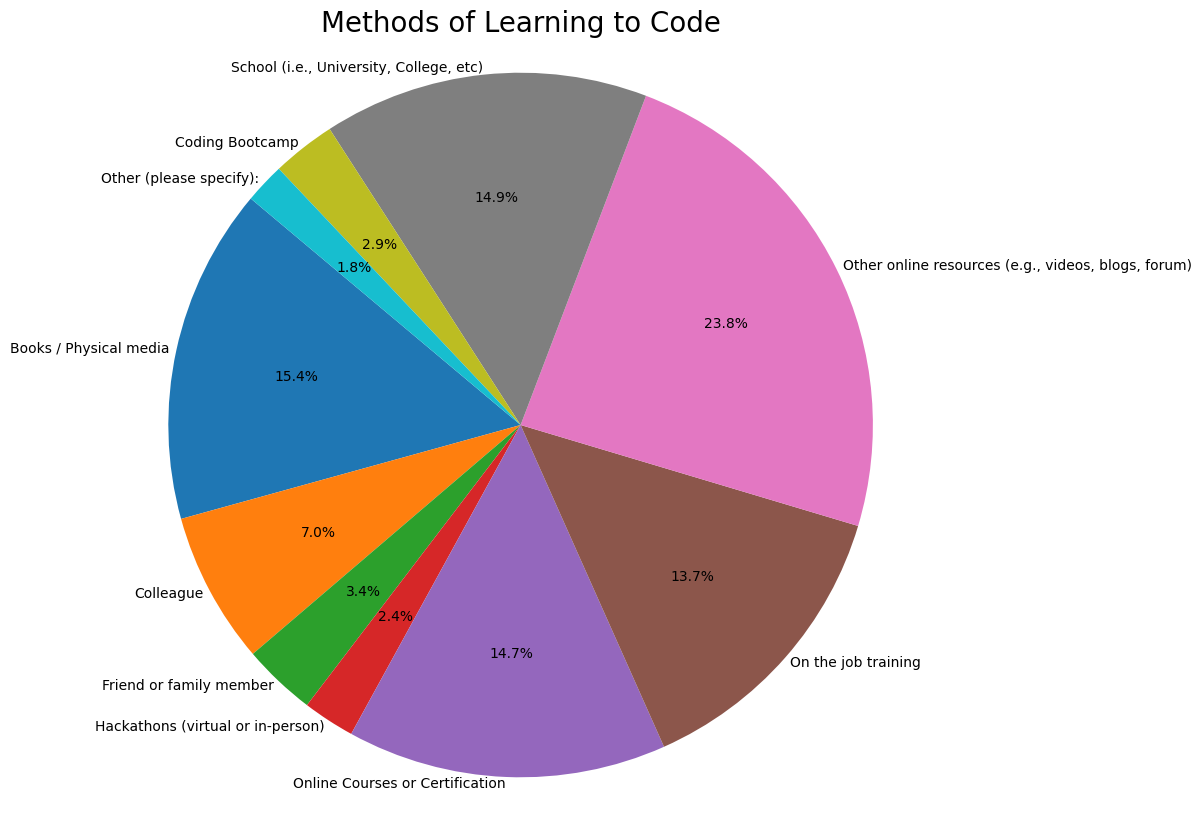

In [12]:

#learn_methods_dict['Online Resources'] = learn_methods_dict.pop('Other online resources (e.g., videos, blogs, forum)')
labels = list(learn_methods_dict.keys())
sizes = list(learn_methods_dict.values())

# Create the pie chart
plt.figure(figsize=(10, 10))  # Optional: set the figure size
plt.style.use('default')
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, textprops={'color': 'black'}, pctdistance=0.65,labeldistance=1.02)


plt.title('Methods of Learning to Code', fontsize=20)

plt.axis('equal')

# Show the plot
plt.show()

In [28]:
# Are you more likely to get a job as a developer if you have a master's degree?

#We will interprete this question as "Are you more likely to be employed with a master's degree compared to a lower academic rank?"

#Let's first compare a Bachelor degree to a master's degree
columns_to_display = ['EdLevel', 'Employment']
#print(df['EdLevel'])
# Loop through the first 5 rows and print values side by side
#for i in range(100):
    #row_values = [str(df[df['EdLevel']=="Bachelor’s degree (B.A., B.S., B.Eng., etc.)"][col].iloc[i]) for col in columns_to_display]
   # print(' | '.join(row_values))

#print(df['EdLevel'])

# Initialize the dictionary
Ed_dict = {'Bachelor': [], 'Master': []}

# Loop through DataFrame rows that match the condition
for index, entry in df[df['EdLevel'] == "Bachelor’s degree (B.A., B.S., B.Eng., etc.)"].iterrows():
    employment_status = entry['Employment']
    if pd.isna(employment_status):
        continue  # Skip if Employment is NaN
    if employment_status == 'Not employed, but looking for work':
        Ed_dict['Bachelor'].append(0)
    elif "Employed," in employment_status.split(" "):
        Ed_dict['Bachelor'].append(1)


print(sum(Ed_dict['Bachelor'])/ len(Ed_dict['Bachelor']))

for index, entry in df[df['EdLevel'] == "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)"].iterrows():
    employment_status = entry['Employment']
    if pd.isna(employment_status):
        continue  # Skip if Employment is NaN
    if employment_status == 'Not employed, but looking for work':
        Ed_dict['Master'].append(0)
    elif "Employed," in employment_status.split(" "):
        Ed_dict['Master'].append(1)


print(sum(Ed_dict['Master'])/ len(Ed_dict['Master']))

0.9662259458044247
0.9771516921491152


I think there is a lot of room for a more detailed analysis here but there are some interesting conclusions that can be drawn already:

Of the population of Bachelor students who are interested in being employed i.e. those looking for work, already employed, not retired, not aiming to be employed etc, only ~3.4% are currently unemployed and actively looking for work.
This leads one to believe that simply having a Bachelor's degree is sufficient to obtain employment. Having a Master's degree seems to only slightly help in that only ~2.3% are unepmployed and looking for work.